In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df = pd.read_csv("E:\Data_Sets\corona.csv")
df.head(7)

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,2/5/20 16:43,16678.0,NaN,538.0,479.0
1,Guangdong,Mainland China,2/5/20 13:23,895.0,NaN,49.0,0.0
2,Zhejiang,Mainland China,2/5/20 15:13,895.0,NaN,78.0,0.0
3,Henan,Mainland China,2/5/20 15:03,764.0,NaN,47.0,2.0
4,Hunan,Mainland China,2/5/20 15:23,661.0,NaN,54.0,0.0
5,Jiangxi,Mainland China,2/5/20 1:33,548.0,NaN,27.0,0.0
6,Anhui,Mainland China,2/5/20 13:43,530.0,NaN,23.0,0.0


In [35]:
#check the number of missing values
df.isnull().sum()

Province/State     459
Country/Region       0
Last Update          0
Confirmed           30
Suspected         1789
Recovered          876
Death              999
dtype: int64

In [36]:
df.dtypes

Province/State     object
Country/Region     object
Last Update        object
Confirmed         float64
Suspected         float64
Recovered         float64
Death             float64
dtype: object

In [37]:
def abc(series):
    return series.fillna(0)



#command to fill the empty cells
df.Confirmed = df["Confirmed"].transform(abc)
df.Recovered = df["Recovered"].transform(abc)
df.Suspected = df["Suspected"].transform(abc)
df.Death = df["Death"].transform(abc)

In [38]:
#check the number of missing values
df.isnull().sum()

Province/State    459
Country/Region      0
Last Update         0
Confirmed           0
Suspected           0
Recovered           0
Death               0
dtype: int64

In [39]:
df.describe()

,Confirmed,Suspected,Recovered,Death
count,1877.000000,1877.000000,1877.000000,1877.000000
mean,162.968034,1.060202,4.599893,3.491209
std,1023.304837,11.423851,29.317235,31.794978
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,0.000000
75%,63.000000,0.000000,1.000000,0.000000
max,16678.000000,244.000000,538.000000,479.000000


In [40]:
set = df.dropna()

In [41]:
#check the number of missing values
set.isnull().sum()

Province/State    0
Country/Region    0
Last Update       0
Confirmed         0
Suspected         0
Recovered         0
Death             0
dtype: int64

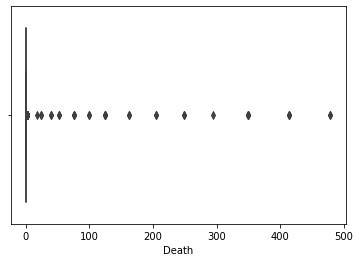

In [86]:
sns.boxplot(x= set["Death"])

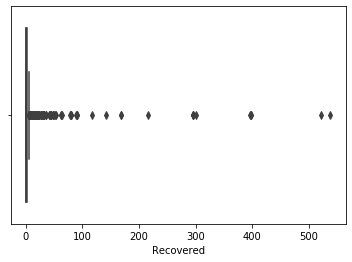

In [87]:
sns.boxplot(x= set["Recovered"])

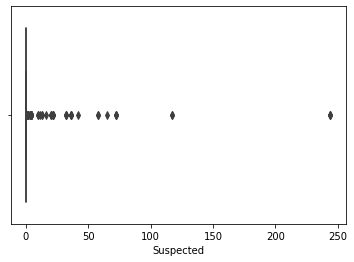

In [88]:
sns.boxplot(x= set["Suspected"])

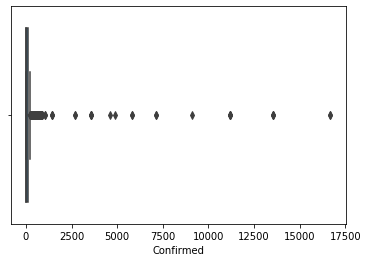

In [89]:
sns.boxplot(x= set["Confirmed"])

In [91]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(set[["Confirmed","Suspected","Recovered","Death"]))
print(z)

KeyError: ('Confirmed', 'Suspected', 'Recovered', 'Death')

(7, 500)

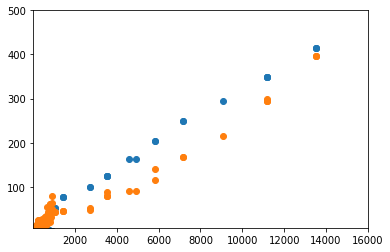

In [74]:
plt.scatter(list(set.Confirmed),list(set.Death))
plt.scatter(list(set.Confirmed),list(set.Recovered))
plt.xlim(1,16000)
plt.ylim(7,500)

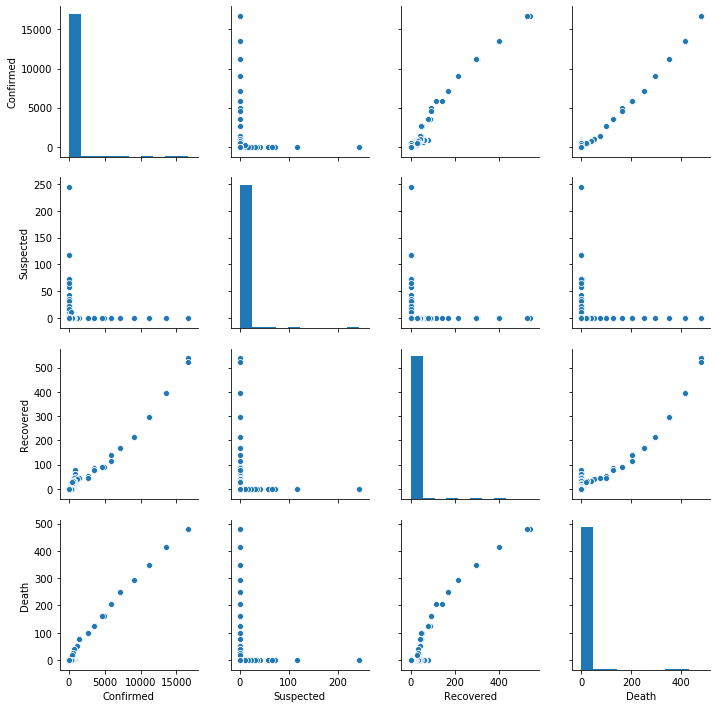

In [55]:
sns.pairplot(set)

In [92]:
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [93]:
x = set[["Confirmed","Suspected","Recovered"]]
y = set[["Death"]]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=106)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
model.coef_

array([[ 0.04289722,  0.01244514, -0.42778692]])

In [95]:
model.intercept_

array([-2.07335246])

In [96]:
predictions = model.predict(x_test)

In [97]:
from sklearn.metrics import mean_absolute_error

from math import sqrt

mae = mean_absolute_error(y_test, predictions)

print(mae)

2.6722337895955426
